<a href="https://colab.research.google.com/github/abulhasanat/MachineLearning/blob/master/fbprophet_part_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [0]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
 
%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

Read in the data

In [0]:
sales_df = pd.read_csv('/content/drive/My Drive/Training data/fbprophet/retail_sales.csv', index_col='date', parse_dates=True)

In [4]:
sales_df.head()

,sales
date,
2019-10-30,6.318787e+06
2019-11-07,7.702524e+06
2019-09-08,1.155229e+07
2020-01-20,5.588498e+06
2020-02-16,1.065042e+07


Prepare for Prophet

In [0]:
df = sales_df.reset_index()

In [6]:
df.head()

,date,sales
0,2019-10-30,6.318787e+06
1,2019-11-07,7.702524e+06
2,2019-09-08,1.155229e+07
3,2020-01-20,5.588498e+06
4,2020-02-16,1.065042e+07


In [0]:
df=df.rename(columns={'date':'ds', 'sales':'y'})

In [8]:
df.head()

,ds,y
0,2019-10-30,6.318787e+06
1,2019-11-07,7.702524e+06
2,2019-09-08,1.155229e+07
3,2020-01-20,5.588498e+06
4,2020-02-16,1.065042e+07


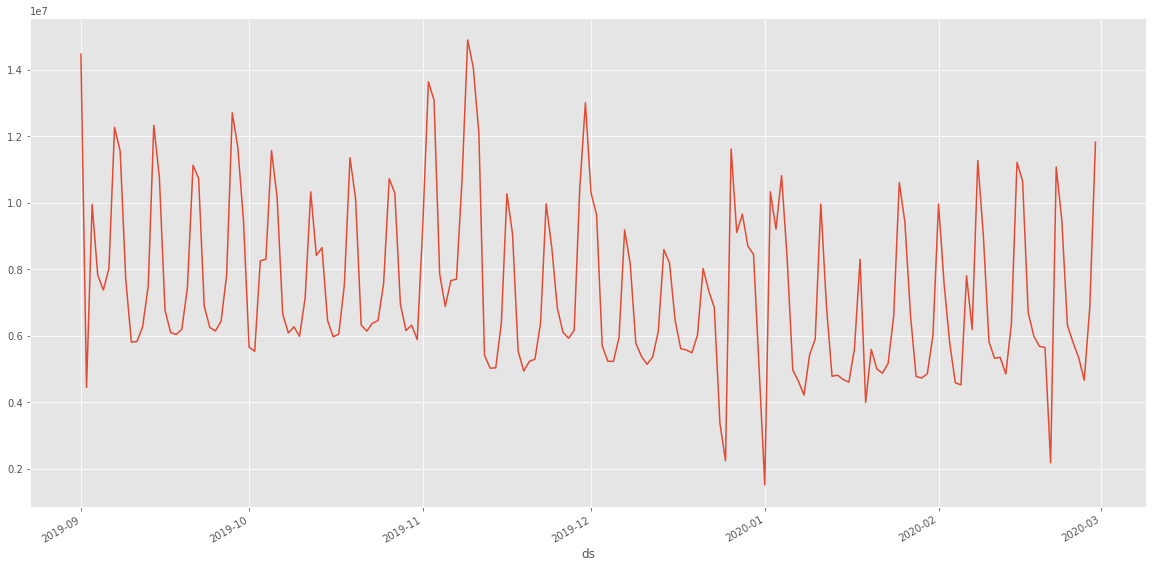

In [9]:
df.set_index('ds').y.plot()

In [0]:
df['y'] = np.log(df['y'])

In [11]:
df.tail()

,ds,y
177,2020-02-07,15.638181
178,2019-10-12,16.150156
179,2019-12-26,16.267702
180,2019-11-06,15.851087
181,2019-11-26,15.624592


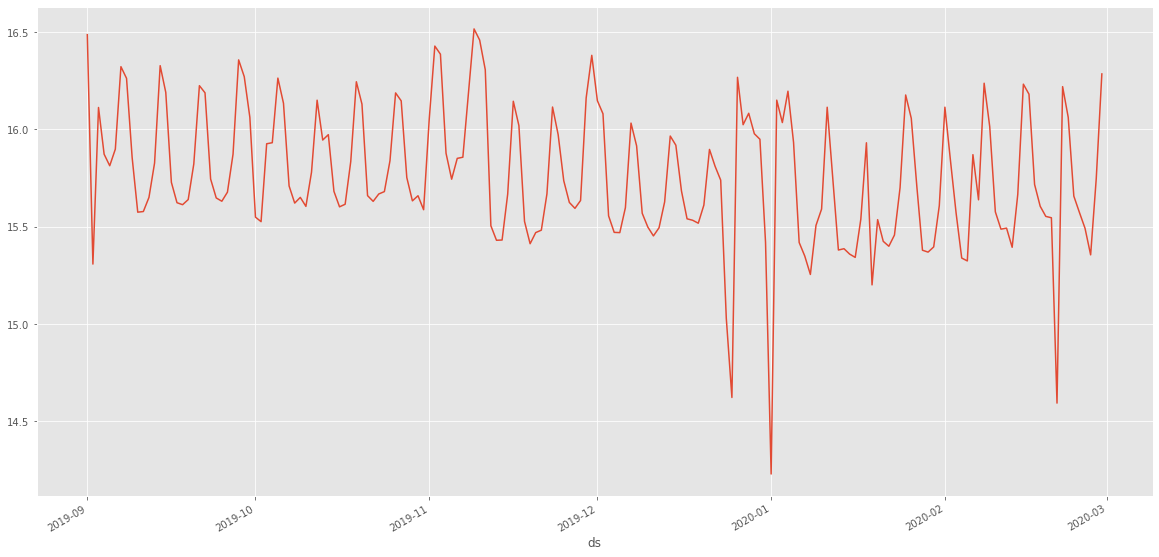

In [12]:
df.set_index('ds').y.plot()

Running Prophet

In [13]:
model = Prophet()
model.fit(df);

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
future = model.make_future_dataframe(periods=24, freq = 'm')
future.tail()

,ds
201,2021-10-31
202,2021-11-30
203,2021-12-31
204,2022-01-31
205,2022-02-28


In [0]:
forecast = model.predict(future)

In [16]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
201,2021-10-31,17.072796,15.376325,19.815175,15.070340,19.529680,0.287181,0.287181,0.287181,0.287181,0.287181,0.287181,0.0,0.0,0.0,17.359977
202,2021-11-30,17.140249,14.741794,19.602434,14.958002,19.757472,-0.227860,-0.227860,-0.227860,-0.227860,-0.227860,-0.227860,0.0,0.0,0.0,16.912389
203,2021-12-31,17.209951,14.836732,20.000745,14.844459,19.987461,-0.010137,-0.010137,-0.010137,-0.010137,-0.010137,-0.010137,0.0,0.0,0.0,17.199814
204,2022-01-31,17.279653,14.712584,20.247177,14.744274,20.270773,-0.041476,-0.041476,-0.041476,-0.041476,-0.041476,-0.041476,0.0,0.0,0.0,17.238178
205,2022-02-28,17.342610,14.592086,20.537210,14.687913,20.529715,-0.041476,-0.041476,-0.041476,-0.041476,-0.041476,-0.041476,0.0,0.0,0.0,17.301135


In [17]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
201,2021-10-31,17.359977,15.376325,19.815175
202,2021-11-30,16.912389,14.741794,19.602434
203,2021-12-31,17.199814,14.836732,20.000745
204,2022-01-31,17.238178,14.712584,20.247177
205,2022-02-28,17.301135,14.592086,20.537210


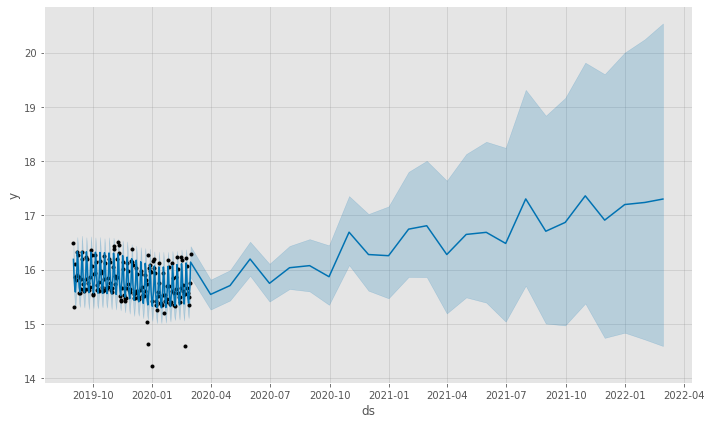

In [18]:
model.plot(forecast);

Visualizing Prophet models

In [0]:
df.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)

In [0]:
viz_df = sales_df.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')

In [25]:
viz_df.head()

,sales,yhat,yhat_lower,yhat_upper
2019-09-01,1.446144e+07,16.189314,15.899697,16.438740
2019-09-02,4.447668e+06,15.860059,15.602254,16.126775
2019-09-03,9.945977e+06,15.673077,15.393899,15.961550
2019-09-04,7.823547e+06,15.587105,15.297837,15.858306
2019-09-05,7.372518e+06,15.767206,15.488462,16.047211


In [0]:
viz_df['yhat_rescaled'] = np.exp(viz_df['yhat'])

In [27]:
viz_df.head()

,sales,yhat,yhat_lower,yhat_upper,yhat_rescaled
2019-09-01,1.446144e+07,16.189314,15.899697,16.438740,1.073816e+07
2019-09-02,4.447668e+06,15.860059,15.602254,16.126775,7.725673e+06
2019-09-03,9.945977e+06,15.673077,15.393899,15.961550,6.408123e+06
2019-09-04,7.823547e+06,15.587105,15.297837,15.858306,5.880219e+06
2019-09-05,7.372518e+06,15.767206,15.488462,16.047211,7.040616e+06


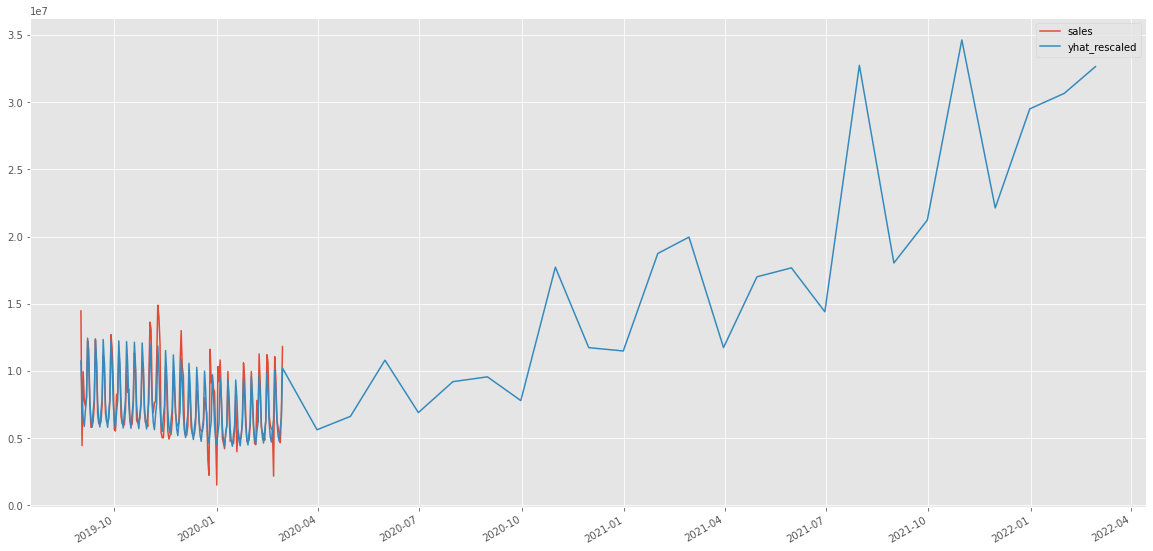

In [28]:
viz_df[['sales', 'yhat_rescaled']].plot()

In [0]:
sales_df.index = pd.to_datetime(sales_df.index) #make sure our index as a datetime object
connect_date = sales_df.index[-2] #select the 2nd to last date

In [0]:
mask = (forecast.index > connect_date)
predict_df = forecast.loc[mask]

In [31]:
predict_df.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2019-11-07,15.854668,15.442816,16.013180,15.854668,15.854668,-0.132534,-0.132534,-0.132534,-0.132534,-0.132534,-0.132534,0.0,0.0,0.0,15.722134
2019-11-08,15.852328,15.557254,16.119416,15.852328,15.852328,-0.010137,-0.010137,-0.010137,-0.010137,-0.010137,-0.010137,0.0,0.0,0.0,15.842191
2019-11-09,15.849988,15.992865,16.568338,15.849988,15.849988,0.438059,0.438059,0.438059,0.438059,0.438059,0.438059,0.0,0.0,0.0,16.288047
2019-11-10,15.845895,15.861126,16.401347,15.845895,15.845895,0.287181,0.287181,0.287181,0.287181,0.287181,0.287181,0.0,0.0,0.0,16.133076
2019-11-11,15.841801,15.504664,16.084307,15.841801,15.841801,-0.041476,-0.041476,-0.041476,-0.041476,-0.041476,-0.041476,0.0,0.0,0.0,15.800326


In [0]:
viz_df = sales_df.join(predict_df[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
viz_df['yhat_scaled']=np.exp(viz_df['yhat'])

In [33]:
viz_df.head()

,sales,yhat,yhat_lower,yhat_upper,yhat_scaled
2019-09-01,1.446144e+07,NaN,NaN,NaN,NaN
2019-09-02,4.447668e+06,NaN,NaN,NaN,NaN
2019-09-03,9.945977e+06,NaN,NaN,NaN,NaN
2019-09-04,7.823547e+06,NaN,NaN,NaN,NaN
2019-09-05,7.372518e+06,NaN,NaN,NaN,NaN


In [34]:
viz_df.tail()

,sales,yhat,yhat_lower,yhat_upper,yhat_scaled
2021-10-31,NaN,17.359977,15.376325,19.815175,3.462119e+07
2021-11-30,NaN,16.912389,14.741794,19.602434,2.212878e+07
2021-12-31,NaN,17.199814,14.836732,20.000745,2.949745e+07
2022-01-31,NaN,17.238178,14.712584,20.247177,3.065106e+07
2022-02-28,NaN,17.301135,14.592086,20.537210,3.264279e+07


IndexError: ignored

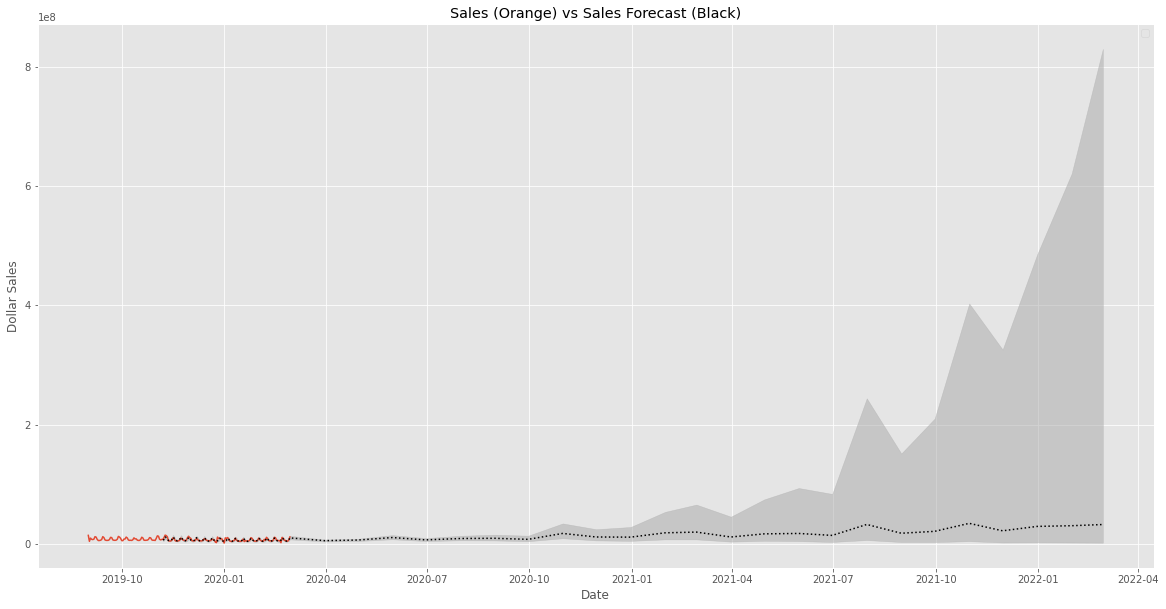

In [35]:
fig, ax1 = plt.subplots()
ax1.plot(viz_df.sales)
ax1.plot(viz_df.yhat_scaled, color='black', linestyle=':')
ax1.fill_between(viz_df.index, np.exp(viz_df['yhat_upper']), np.exp(viz_df['yhat_lower']), alpha=0.5, color='darkgray')
ax1.set_title('Sales (Orange) vs Sales Forecast (Black)')
ax1.set_ylabel('Dollar Sales')
ax1.set_xlabel('Date')

L=ax1.legend() #get the legend
L.get_texts()[0].set_text('Actual Sales') #change the legend text for 1st plot
L.get_texts()[1].set_text('Forecasted Sales') #change the legend text for 2nd plot